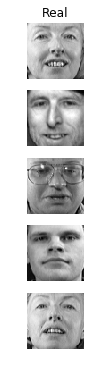

In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
import math
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
%matplotlib inline


data = fetch_olivetti_faces(shuffle=True,random_state=10)
targets = data.target
data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30] 

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

face_array_length = data.shape[1]
# Upper half for input 
 # Lower half for output
X_train = train[:, :math.ceil(0.5 * face_array_length)] 
y_train = train[:, math.floor(0.5 * face_array_length):] 
X_test = test[:, :math.ceil(0.5 * face_array_length)]
y_test = test[:, math.floor(0.5 * face_array_length):]

X_train =X_train.astype(np.float32)
y_train =y_train.astype(np.float32)
X_test =X_test.astype(np.float32)
y_test =y_test.astype(np.float32)






mlp = MLPRegressor( activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(400, 600), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9
     )
mlp.fit(X_train, y_train) 

 
y_test_predict = mlp.predict(X_test)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12,6)
n_faces=5
n_cols=5
image_shape = (64, 64)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="Real")


    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")
plt.show()

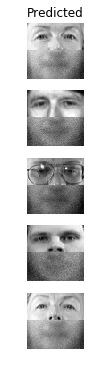

In [29]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6)
for i in range(n_faces):
    predicted_face = np.hstack((X_test[i],y_test_predict[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="Predicted")


    sub.axis("off")
    sub.imshow(predicted_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")
plt.show()

In [31]:
parameters = {'hidden_layer_sizes':[(10,20),(50,100),(400,600)], 'activation':['relu','tanh','logistic']}
grid_search = GridSearchCV(MLPRegressor(), parameters, cv=10, n_jobs=4, scoring='neg_mean_squared_error')


grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
 
print   (metrics.mean_squared_error(y_test,y_pred)) 
print(grid_search.best_params_)

0.0175551412739
{'activation': 'relu', 'hidden_layer_sizes': (400, 600)}
